Name: Sricharan Koride
Github Username:sricharan-koride
USC ID:2343517466

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as stats
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression 
from itertools import combinations
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
import numpy as np

## 1(b)(i) 
No of rows - 9568
No of columns - 5

Rows represent data points, recorded as hourly averages of all the ambient variables listed below over the 6-year period.

Columns represent features which consist of hourly average ambient variables 
- Temperature (T)
- Ambient Pressure (AP)
- Relative Humidity (RH)
- Exhaust Vacuum (V)
the above 4 (T, AP, EH, V) are independent variables which are used to predict EP the dependent variable 
- the net hourly electrical energy output (EP)  of the plant.

In [4]:
df = pd.read_excel('../data/Folds5x2_pp.xlsx', engine='openpyxl')
print(df)
missing_values = df.isna().sum()
print(missing_values)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]
AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


## 1(b)(ii) From the pairwise scatterplots
Findings: 
- the highest correlation among input features is between AT and V i.e, Exhaust Vacuum and Temperature
- With the target variable PE (energy output) and AT & V (Temperature and Exhaust Vacuum)
- Between other input variables and input variables and the target variable, there is comparitively less correleation 

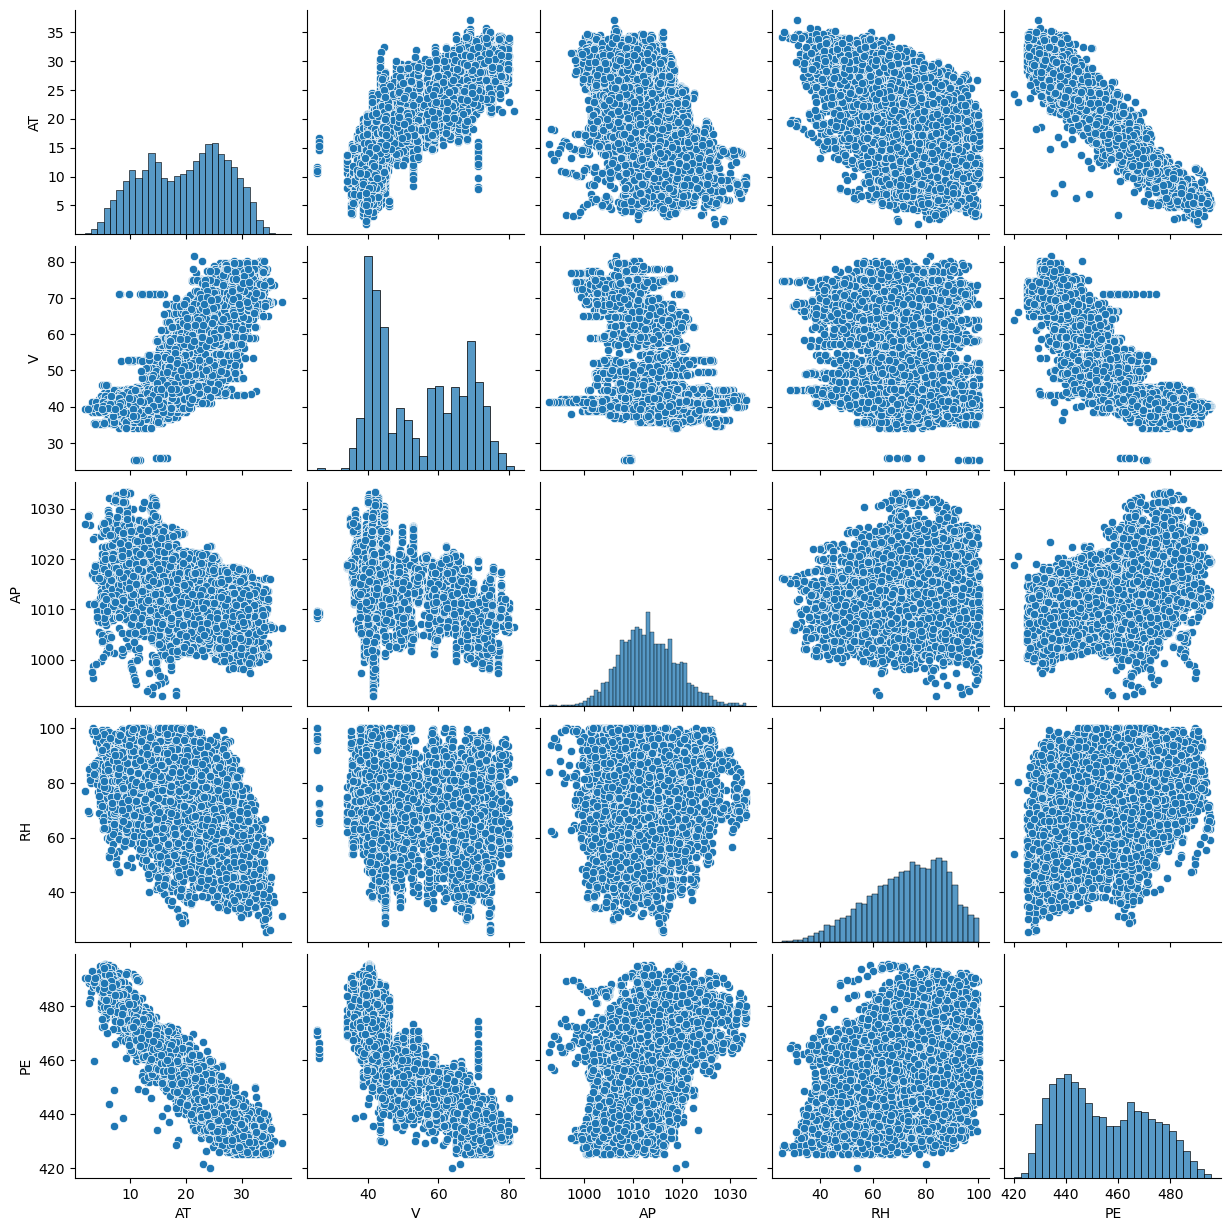

In [6]:
sb.pairplot(df)
plt.show()

## 1(b)(iii) mean, median, range, first quartile, third quartile, inter quartile range of variables

In [8]:
row_labels = ['mean', 'median', 'range', 'first quartile', 'third quartile', 'inter quartile range']
column_labels = ['AT', 'V', 'AP', 'RH', 'PE'] 
Q1, Q3 = df.quantile(0.25), df.quantile(0.75)
data = [
    df.mean().tolist(), df.median().tolist(), (df.max() - df.min()).tolist(), Q1.tolist(), Q3.tolist(), (Q3 - Q1).tolist()
]
pd.DataFrame(data, index=row_labels, columns=column_labels)


,AT,V,AP,RH,PE
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
median,20.345000,52.080000,1012.940000,74.975000,451.550000
range,35.300000,56.200000,40.410000,74.600000,75.500000
first quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
third quartile,25.720000,66.540000,1017.260000,84.830000,468.430000
inter quartile range,12.210000,24.800000,8.160000,21.502500,28.680000


## 1(c) from the summary of the stats
- All predictors are significant: Based on the p-values, all four predictors have a significant impact on PE.
- AT and V have strong negative relationships: These predictors show the strongest associations with PE, with narrow confidence intervals.
- AP and RH have positive relationships: While the relationships are significant, they are slightly weaker than those between AT and V.

In [10]:
stats_dict = {}
row_labels = ['Coefficient', 'p-value', 't-statistic', 'confidence interval']
column_labels = ['AT', 'V', 'AP', 'RH', 'PE'] 
for predictor in df.columns[0:4]:
    X = df[predictor]
    X = stats.add_constant(X) 
    SLR_model = stats.OLS(df['PE'], X).fit()
    print(SLR_model.summary())
    stats_dict[predictor] = {
        'Coefficient': SLR_model.params[predictor],
    }
stat_summary_df = pd.DataFrame.from_dict(stats_dict, orient='index')
print(stat_summary_df['Coefficient'])


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:28:07   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

## here are some possible outliers:
- AT versus PE: Perhaps within the low-temperature range of values, some points are going to be far away from the cluster.
- V vs PE: Few of the highest points in the range of V could be outliers as they seem to be off the general slope.
- AP vs PE A couple of points in the lower range of AP might be outliers-particularly any that fall significantly far from the regression line.
- RH vs PE: This one is tougher because of the dispersion in the points. There could be one or two really far away from the rest of the data.

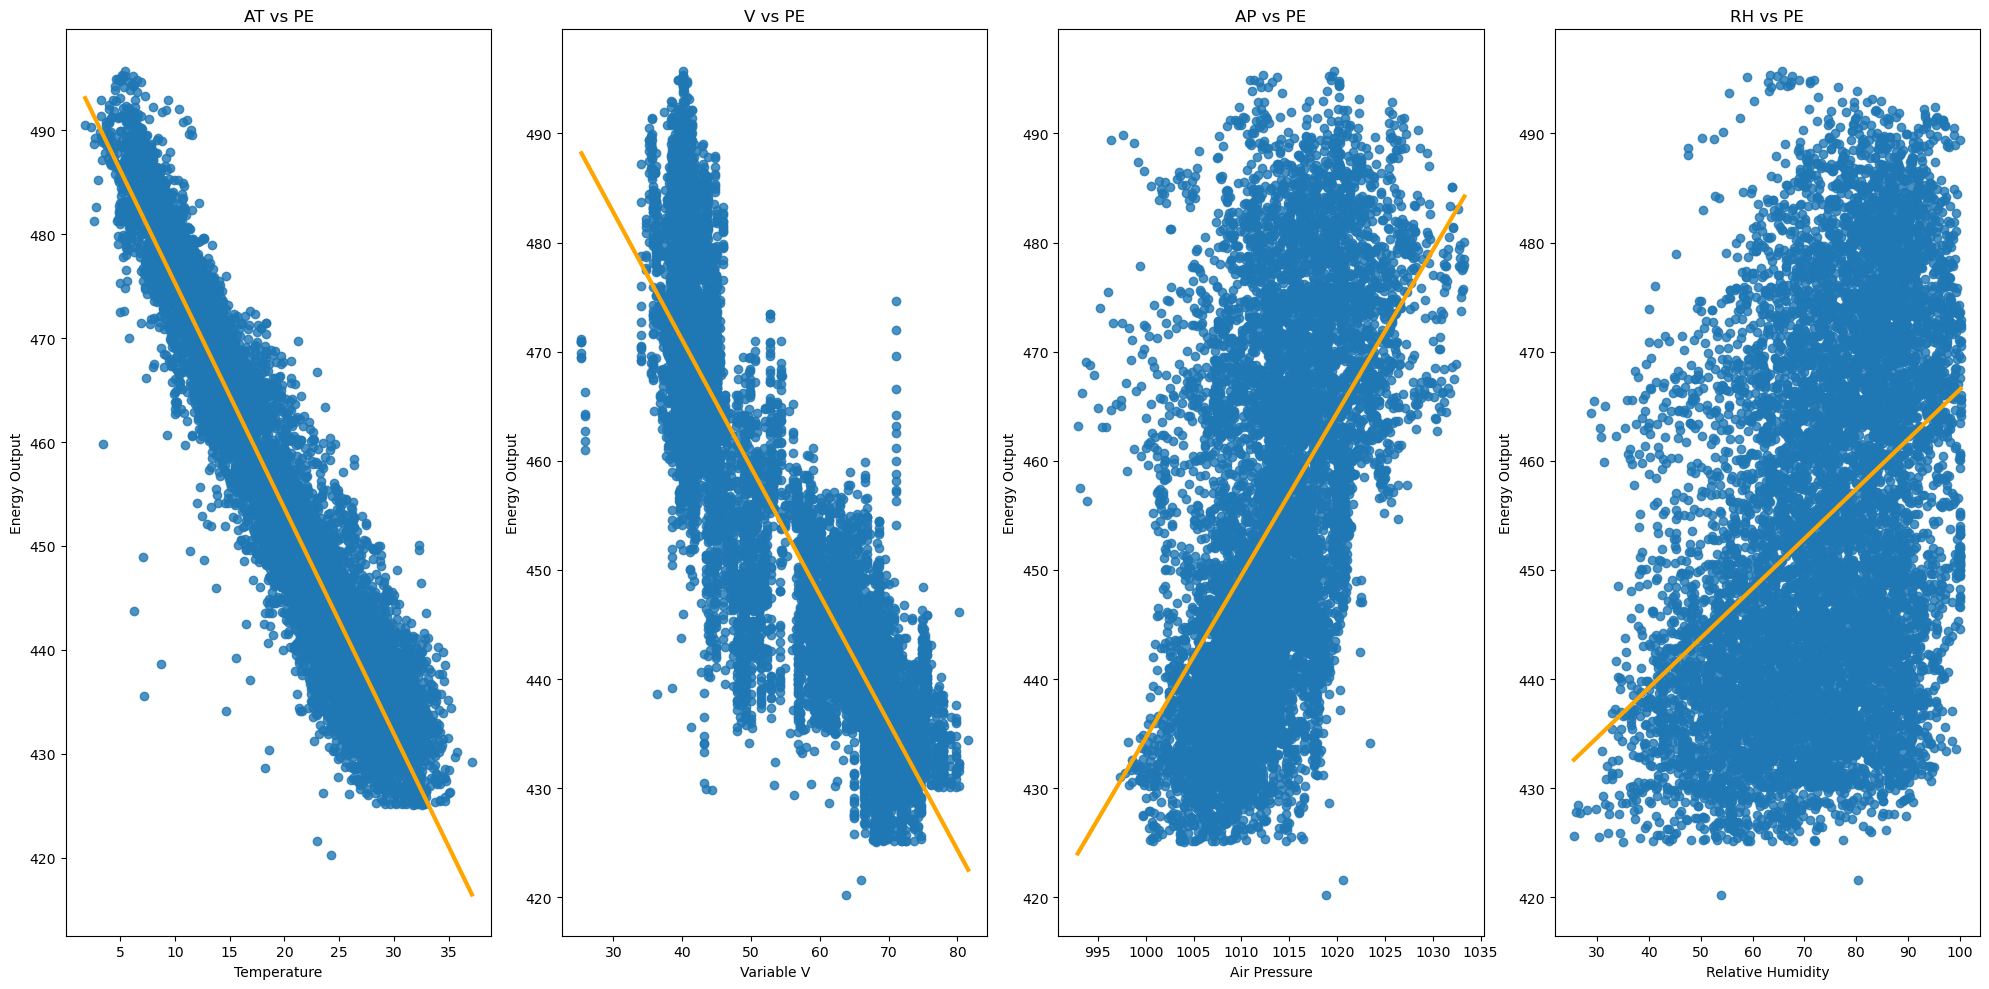

In [12]:
titles = ['AT vs PE', 'V vs PE', 'AP vs PE', 'RH vs PE']
x_labels = ['Temperature', 'Variable V', 'Air Pressure', 'Relative Humidity']
y_label = 'Energy Output'
plt.figure(figsize=(20,10))
for i, var in enumerate(['AT', 'V', 'AP', 'RH'], start=1):
    plt.subplot(1, 4, i)  
    sb.regplot(x=var, y='PE', data=df, ci=None, line_kws={"linewidth": 3, "color": "orange"})
   
    plt.title(titles[i-1]) 
    plt.xlabel(x_labels[i-1])  
    plt.ylabel(y_label) 

plt.tight_layout()
plt.show()

## 1(d) based on the statistical reult, we can reject the null hypothesis for all the predictors

In [14]:
X = df[['AT', 'V', 'AP', 'RH']]
X = stats.add_constant(X) 
SLR_model = stats.OLS(df['PE'], X).fit()
stat_summary_df['Multivariate Coefficient'] = SLR_model.params[1:]
print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:28:08   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

## 1(e) plot of univariate regression coefficients on X-Axis and multivariate coefficients on Y-axis

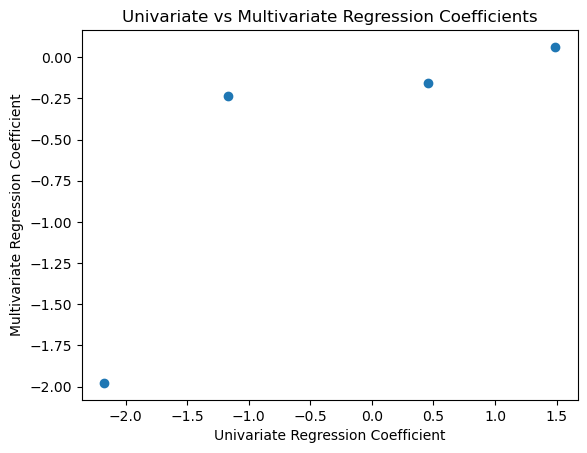

In [16]:
plt.scatter(stat_summary_df['Coefficient'], stat_summary_df['Multivariate Coefficient'])
plt.xlabel('Univariate Regression Coefficient')
plt.ylabel('Multivariate Regression Coefficient')
plt.title('Univariate vs Multivariate Regression Coefficients')
plt.show()

# AT has changed a little. The rest of the 3 values have a greater coefficient.

## 1(f) non linearity
- AT has significant non-linearity.
- V for the most part no nonlinearity since coefficients of V^2 and V^3 are statistically insignificant.
- AP has non-linearity.
- RH has non-linearity.

In [19]:

for predictor in df.columns[0:4]:
    formula = "PE ~ {} + I({}**2) + I({}**3)".format(predictor, predictor, predictor)
    model = sm.ols(formula, data = df).fit()
    print('\nmodel summary for {}'.format(predictor))
    print(model.summary())




model summary for AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:28:08   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.7281      0.6

## 1(g) V**2 is the insiginifcant term

In [21]:
X = df[df.columns[0:4]]

formula = "PE ~ AT + V + AP + RH + I(AT**2) + I(V**2) + I(AP**2) + I(RH**2) + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH + AT:V:AP + AT:V:RH + AT:AP:RH + V:AP:RH + AT:V:AP:RH"
model = sm.ols(formula, data = df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     7758.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:28:08   Log-Likelihood:                -27328.
No. Observations:                9568   AIC:                         5.470e+04
Df Residuals:                    9548   BIC:                         5.484e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3941.9941   1437.903     -2.741      0.0

## 1(h) 

In [23]:
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

predictor_model = sm.ols(formula='PE ~ AT + V + AP + RH', data=train_set).fit()
train_preds_predictor = predictor_model.predict(train_set)
test_preds_predictor = predictor_model.predict(test_set)
train_mse_predictor = mean_squared_error(train_set['PE'], train_preds_predictor)
test_mse_predictor = mean_squared_error(test_set['PE'], test_preds_predictor)
print(f"Predictor Model Train MSE: {train_mse_predictor}, Test MSE: {test_mse_predictor}")

interaction_model_V2 = sm.ols(formula='PE ~ AT*V*AP*RH + I(AT**2) + I(V**2) + I(AP**2) + I(RH**2)', data=train_set).fit()
train_preds_interaction_V2 = interaction_model_V2.predict(train_set)
test_preds_interaction_V2 = interaction_model_V2.predict(test_set)
train_mse_interaction_V2 = mean_squared_error(train_set['PE'], train_preds_interaction_V2)
test_mse_interaction_V2 = mean_squared_error(test_set['PE'], test_preds_interaction_V2)
print(f"Interaction Model Train MSE with V**2: {train_mse_interaction_V2}, Test MSE: {test_mse_interaction_V2}")

interaction_model = sm.ols(formula='PE ~ AT*V*AP*RH + I(AT**2) + I(AP**2) + I(RH**2)', data=train_set).fit()
train_preds_interaction = interaction_model.predict(train_set)
test_preds_interaction = interaction_model.predict(test_set)
train_mse_interaction = mean_squared_error(train_set['PE'], train_preds_interaction)
test_mse_interaction = mean_squared_error(test_set['PE'], test_preds_interaction)



print(f"Interaction Model Train MSE wihtout V**2: {train_mse_interaction}, Test MSE: {test_mse_interaction}")


Predictor Model Train MSE: 20.58083972573871, Test MSE: 21.239856938225284
Interaction Model Train MSE with V**2: 17.527486942184915, Test MSE: 18.216543497593992
Interaction Model Train MSE wihtout V**2: 17.528245521425045, Test MSE: 18.206639219388396


The performance of the model is better after including the interaction terms. Also after excluding V**2 the difference in test or train error is not much.

## 1(i)

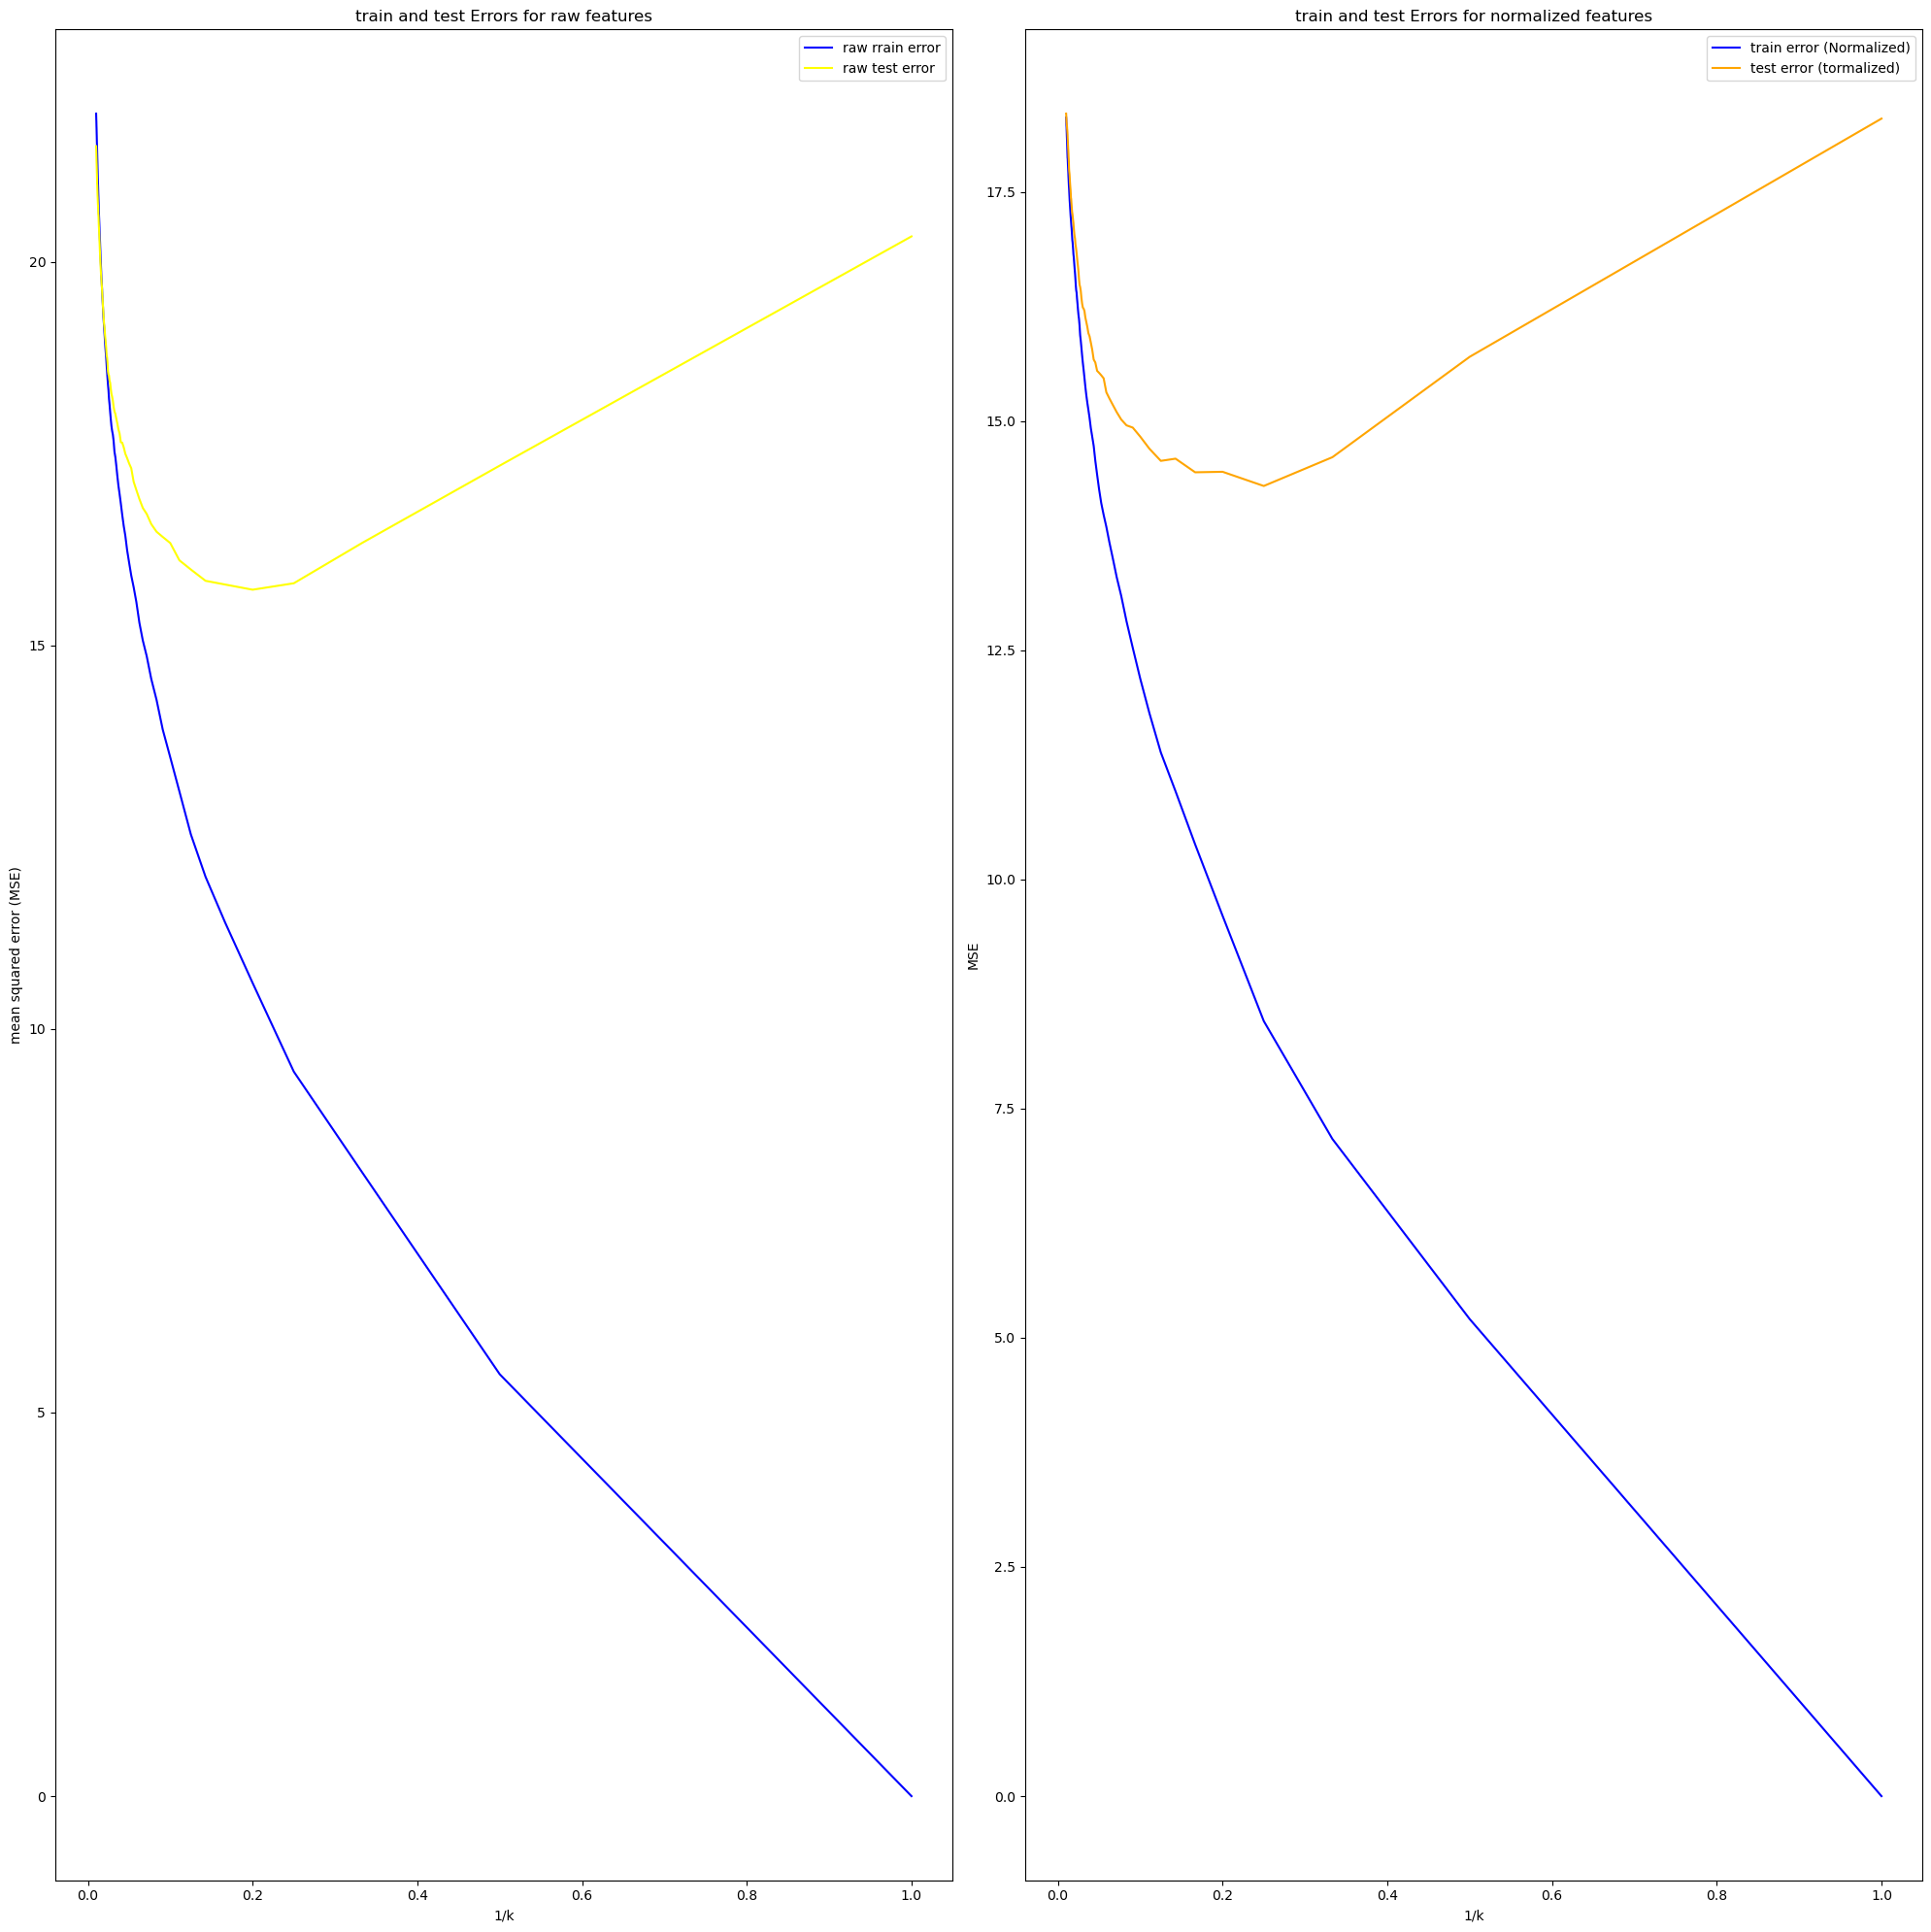

best k for raw features: 5, Test MSE: 15.7268
best k for normalized features: 4, Test MSE: 14.2913


In [26]:
X = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
normalised_X_train = scaler.fit_transform(X_train)
normalised_X_test = scaler.transform(X_test)

raw_train_errors = []
raw_test_errors = []
normalised_train_errors = []
normalised_test_errors = []

for k in range(1, 101):
    raw_knn = KNeighborsRegressor(n_neighbors=k)
    raw_knn.fit(X_train, y_train)
    raw_train_preds = raw_knn.predict(X_train)
    raw_test_preds = raw_knn.predict(X_test)
    raw_train_errors.append(mean_squared_error(y_train, raw_train_preds))
    raw_test_errors.append(mean_squared_error(y_test, raw_test_preds))
    normalised_knn = KNeighborsRegressor(n_neighbors=k)
    normalised_knn.fit(normalised_X_train, y_train)
    normalised_train_preds = normalised_knn.predict(normalised_X_train)
    normalised_test_preds = normalised_knn.predict(normalised_X_test)
    normalised_train_errors.append(mean_squared_error(y_train, normalised_train_preds))
    normalised_test_errors.append(mean_squared_error(y_test, normalised_test_preds))

k_values = np.arange(1, 101)
inverted_k = 1 / k_values
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.plot(inverted_k, raw_train_errors, label='raw rrain error', color='blue')
plt.plot(inverted_k, raw_test_errors, label='raw test error', color='yellow')
plt.title('train and test Errors for raw features')
plt.xlabel('1/k')
plt.ylabel('mean squared error (MSE)')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(inverted_k, normalised_train_errors, label='train error (Normalized)', color='blue')
plt.plot(inverted_k, normalised_test_errors, label='test error (tormalized)', color='orange')
plt.title('train and test Errors for normalized features')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.legend()
plt.tight_layout()
plt.show()


raw_best_k = np.argmin(raw_test_errors) + 1
normalised_best_k = np.argmin(normalised_test_errors) + 1
print(f"best k for raw features: {raw_best_k}, Test MSE: {raw_test_errors[raw_best_k-1]:.4f}")
print(f"best k for normalized features: {normalised_best_k}, Test MSE: {normalised_test_errors[normalised_best_k-1]:.4f}")

## 2 ISLR 2.4.1
For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.
- (a) Given the large sample size, a comparitively flexible learning method will be more appropriate and give a better fit. **better**
- (b) Given the sparse number of data points, a more flexible method be an overfit. **worse**
- (c) Flexible methods tend to capture the non-linear relationships better. **better**
- (d) With a high error variance, flexible methods tend to overfit. **worse**

## 3 ISLR 2.4.7
- (a) The Euclidean distance between each observation and the test point [0,0,0] is calculated using the formula:
dsqrt(=(X1−0^)2+(X2−0^)2+(X3−0^))2
The distances are showle below    - obs1 - 3
    - obs2 - 2
    - obs3 - 3.2
    - obs4 - 2.2
    - obs5 - 1.4
    - obs6 - 1.7

- (b) Prediction for K=1: When K=1, the closest observation is number 5 with a distance of approximately 1.4. our prediction is Green.-  (c) Prediction for K=3: For K=3, the three closest observations are numbers 2, 5, and 6. Observations 2 and 6 are labeled as Red, and observation 5 i -  labeled as Green. Since the majority (2 out of 3) are Red, our prediction for K=3 is Red.

.- 
(d) Best Value ofKK: If the Bayes decision boundary is highly non-linear, a smaller value ofKK would perform better because it can capture the non-linearity by focusing on fewer nearby pointse.
.


SOURCES USED
1) https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/
2) https://medium.com/@upendravijay2/nonlinearity-in-data-6c625cc886f6